In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("tedsa_puf_2021.csv")

In [3]:
#Load the dataset
dataset

,ADMYR,CASEID,STFIPS,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,ARRESTS,...,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG,CBSA2020
0,2021,1284929,2,4,2,5,-9,1,1,0,...,0,0,0,0,0,9,4,0,3,11260
1,2021,1199988,2,2,1,5,3,0,7,0,...,0,0,0,0,1,9,4,0,2,-9
2,2021,1179533,2,4,1,7,-9,0,1,0,...,0,0,0,0,0,9,4,0,3,21820
3,2021,1146520,2,2,2,7,-9,1,1,0,...,0,0,0,0,0,9,4,0,2,11260
4,2021,1213798,2,2,1,7,-9,5,1,0,...,0,0,0,0,0,9,4,1,2,11260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482538,2021,1422638,56,4,1,7,1,0,7,0,...,0,0,0,0,0,8,4,0,1,-9
1482539,2021,1204221,56,2,1,6,1,0,7,0,...,0,0,0,0,0,8,4,0,2,-9
1482540,2021,1116846,56,3,-9,7,-9,0,-9,0,...,0,0,0,0,0,8,4,0,1,-9
1482541,2021,1126341,56,4,4,7,-9,0,1,0,...,0,0,0,0,0,8,4,0,1,-9


In [4]:
#Exploratory data analysis(EDA)
#Basic statistics
print(dataset.head())
print(dataset.info())
print(dataset.describe())

   ADMYR   CASEID  STFIPS  EDUC  MARSTAT  SERVICES  DETCRIM  NOPRIOR  PSOURCE  \
0   2021  1284929       2     4        2         5       -9        1        1   
1   2021  1199988       2     2        1         5        3        0        7   
2   2021  1179533       2     4        1         7       -9        0        1   
3   2021  1146520       2     2        2         7       -9        1        1   
4   2021  1213798       2     2        1         7       -9        5        1   

   ARRESTS  ...  BARBFLG  SEDHPFLG  INHFLG  OTCFLG  OTHERFLG  DIVISION  \
0        0  ...        0         0       0       0         0         9   
1        0  ...        0         0       0       0         1         9   
2        0  ...        0         0       0       0         0         9   
3        0  ...        0         0       0       0         0         9   
4        0  ...        0         0       0       0         0         9   

   REGION  IDU  ALCDRUG  CBSA2020  
0       4    0        3     1126

In [5]:
dataset.columns

Index(['ADMYR', 'CASEID', 'STFIPS', 'EDUC', 'MARSTAT', 'SERVICES', 'DETCRIM',
       'NOPRIOR', 'PSOURCE', 'ARRESTS', 'EMPLOY', 'METHUSE', 'PSYPROB', 'PREG',
       'GENDER', 'VET', 'LIVARAG', 'DAYWAIT', 'DSMCRIT', 'AGE', 'RACE',
       'ETHNIC', 'DETNLF', 'PRIMINC', 'SUB1', 'SUB2', 'SUB3', 'ROUTE1',
       'ROUTE2', 'ROUTE3', 'FREQ1', 'FREQ2', 'FREQ3', 'FRSTUSE1', 'FRSTUSE2',
       'FRSTUSE3', 'HLTHINS', 'PRIMPAY', 'FREQ_ATND_SELF_HELP', 'ALCFLG',
       'COKEFLG', 'MARFLG', 'HERFLG', 'METHFLG', 'OPSYNFLG', 'PCPFLG',
       'HALLFLG', 'MTHAMFLG', 'AMPHFLG', 'STIMFLG', 'BENZFLG', 'TRNQFLG',
       'BARBFLG', 'SEDHPFLG', 'INHFLG', 'OTCFLG', 'OTHERFLG', 'DIVISION',
       'REGION', 'IDU', 'ALCDRUG', 'CBSA2020'],
      dtype='object')

In [6]:
#checking null values 
print(dataset.isnull().sum())

ADMYR       0
CASEID      0
STFIPS      0
EDUC        0
MARSTAT     0
           ..
DIVISION    0
REGION      0
IDU         0
ALCDRUG     0
CBSA2020    0
Length: 62, dtype: int64


In [7]:
#Count the number of occurrences of -9 in the DataFrame

# -9 represents the missing/unknown/not collected/ invalid values

count_minus_9 = (dataset == -9).sum()
print("Count of -9")
print(count_minus_9)

Count of -9
ADMYR            0
CASEID           0
STFIPS           0
EDUC        265892
MARSTAT     408384
             ...  
DIVISION         0
REGION           0
IDU         257217
ALCDRUG          0
CBSA2020    542939
Length: 62, dtype: int64


In [8]:
dataset = dataset.drop(dataset[(dataset == -9).any(axis=1)].index)
dataset

,ADMYR,CASEID,STFIPS,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,ARRESTS,...,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG,CBSA2020
183,2021,1379836,2,3,4,5,5,4,7,0,...,0,0,0,0,1,9,4,1,2,11260
232,2021,1124156,2,2,1,5,8,1,7,0,...,0,0,0,0,1,9,4,0,2,11260
288,2021,1137049,2,3,3,6,3,3,7,0,...,0,0,0,0,0,9,4,1,3,11260
289,2021,1460373,2,3,3,5,3,3,7,0,...,0,0,0,0,0,9,4,1,3,11260
451,2021,1252661,2,2,1,5,6,1,7,0,...,0,0,0,0,0,9,4,1,2,11260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480004,2021,1254005,56,3,3,7,3,5,7,0,...,0,0,0,0,0,8,4,1,3,40540
1480862,2021,1278250,56,3,1,5,1,3,7,0,...,0,0,0,0,0,8,4,1,3,40540
1481325,2021,1273721,56,2,2,6,3,1,7,0,...,0,0,0,0,0,8,4,0,3,16940
1482227,2021,1363961,56,4,2,5,1,1,7,0,...,0,0,0,0,0,8,4,1,2,40540


In [9]:
dataset = dataset.reset_index()
dataset

,index,ADMYR,CASEID,STFIPS,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,...,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG,CBSA2020
0,183,2021,1379836,2,3,4,5,5,4,7,...,0,0,0,0,1,9,4,1,2,11260
1,232,2021,1124156,2,2,1,5,8,1,7,...,0,0,0,0,1,9,4,0,2,11260
2,288,2021,1137049,2,3,3,6,3,3,7,...,0,0,0,0,0,9,4,1,3,11260
3,289,2021,1460373,2,3,3,5,3,3,7,...,0,0,0,0,0,9,4,1,3,11260
4,451,2021,1252661,2,2,1,5,6,1,7,...,0,0,0,0,0,9,4,1,2,11260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,1480004,2021,1254005,56,3,3,7,3,5,7,...,0,0,0,0,0,8,4,1,3,40540
761,1480862,2021,1278250,56,3,1,5,1,3,7,...,0,0,0,0,0,8,4,1,3,40540
762,1481325,2021,1273721,56,2,2,6,3,1,7,...,0,0,0,0,0,8,4,0,3,16940
763,1482227,2021,1363961,56,4,2,5,1,1,7,...,0,0,0,0,0,8,4,1,2,40540


In [10]:
#NOPRIOR : Previous subsstance use treatment episodes
#It indicates the number of previous treatment episode that the client has received in any substance use 
#treatment programs
#assumption
#if previous treatment episode are more than 0, then it means it's a case of relapse
# relapse is the Target variable

dataset['relapse'] = dataset['NOPRIOR'].apply(lambda x: 0 if x < 1 else 1)

In [11]:
dataset

,index,ADMYR,CASEID,STFIPS,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,...,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG,CBSA2020,relapse
0,183,2021,1379836,2,3,4,5,5,4,7,...,0,0,0,1,9,4,1,2,11260,1
1,232,2021,1124156,2,2,1,5,8,1,7,...,0,0,0,1,9,4,0,2,11260,1
2,288,2021,1137049,2,3,3,6,3,3,7,...,0,0,0,0,9,4,1,3,11260,1
3,289,2021,1460373,2,3,3,5,3,3,7,...,0,0,0,0,9,4,1,3,11260,1
4,451,2021,1252661,2,2,1,5,6,1,7,...,0,0,0,0,9,4,1,2,11260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,1480004,2021,1254005,56,3,3,7,3,5,7,...,0,0,0,0,8,4,1,3,40540,1
761,1480862,2021,1278250,56,3,1,5,1,3,7,...,0,0,0,0,8,4,1,3,40540,1
762,1481325,2021,1273721,56,2,2,6,3,1,7,...,0,0,0,0,8,4,0,3,16940,1
763,1482227,2021,1363961,56,4,2,5,1,1,7,...,0,0,0,0,8,4,1,2,40540,1


In [12]:
detailed_mapping = {
    1: 4,  # Homemaker
    2: 5,  # Student
    3: 6,  # Retired, disabled
    4: 7,  # Resident of institution
    5: 8   # Other
}

# Combine columns
def combine_columns(row):
    if row['EMPLOY'] == 4:  # Not in labor force
        return detailed_mapping.get(row['DETNLF'], row['EMPLOY'])
    return row['EMPLOY']

# Apply the transformation directly to the EMPLOY column
dataset['EMPLOY'] = dataset.apply(combine_columns, axis=1)

print(dataset)

       index  ADMYR   CASEID  STFIPS  EDUC  MARSTAT  SERVICES  DETCRIM  \
0        183   2021  1379836       2     3        4         5        5   
1        232   2021  1124156       2     2        1         5        8   
2        288   2021  1137049       2     3        3         6        3   
3        289   2021  1460373       2     3        3         5        3   
4        451   2021  1252661       2     2        1         5        6   
..       ...    ...      ...     ...   ...      ...       ...      ...   
760  1480004   2021  1254005      56     3        3         7        3   
761  1480862   2021  1278250      56     3        1         5        1   
762  1481325   2021  1273721      56     2        2         6        3   
763  1482227   2021  1363961      56     4        2         5        1   
764  1482229   2021  1283563      56     4        2         5        1   

     NOPRIOR  PSOURCE  ...  SEDHPFLG  INHFLG  OTCFLG  OTHERFLG  DIVISION  \
0          4        7  ...         

In [13]:
dataset = dataset.drop(['index','NOPRIOR','ADMYR','CASEID','DETNLF','REGION','DIVISION','DAYWAIT','DETCRIM','HLTHINS','ALCFLG','BARBFLG','BENZFLG','COKEFLG','HALLFLG','HERFLG','IDU','INHFLG','MARFLG','METHFLG','MTHAMFLG','OPSYNFLG','OTCFLG','OTHERFLG','PCPFLG','SEDHPFLG','STFIPS','STIMFLG','TRNQFLG','CBSA2020'],axis = 1)

In [14]:
dataset

,EDUC,MARSTAT,SERVICES,PSOURCE,ARRESTS,EMPLOY,METHUSE,PSYPROB,PREG,GENDER,...,FREQ2,FREQ3,FRSTUSE1,FRSTUSE2,FRSTUSE3,PRIMPAY,FREQ_ATND_SELF_HELP,AMPHFLG,ALCDRUG,relapse
0,3,4,5,7,0,8,2,1,2,2,...,3,3,3,3,2,4,2,0,2,1
1,2,1,5,7,0,5,2,1,2,2,...,3,2,3,2,2,2,1,0,2,1
2,3,3,6,7,0,8,2,1,2,2,...,3,3,4,2,4,4,1,0,3,1
3,3,3,5,7,0,8,1,1,2,2,...,3,3,4,2,4,4,1,0,3,1
4,2,1,5,7,0,7,2,2,2,2,...,2,2,6,4,7,7,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,3,3,7,7,0,6,2,1,2,2,...,1,1,3,6,5,7,5,0,3,1
761,3,1,5,7,0,7,2,1,2,2,...,1,1,6,6,3,7,1,0,3,1
762,2,2,6,7,0,6,2,2,2,2,...,1,1,5,6,1,7,1,0,3,1
763,4,2,5,7,0,7,2,1,2,2,...,1,1,7,4,2,7,1,0,2,1


In [15]:
dataset["relapse"].value_counts()

relapse
1    572
0    193
Name: count, dtype: int64

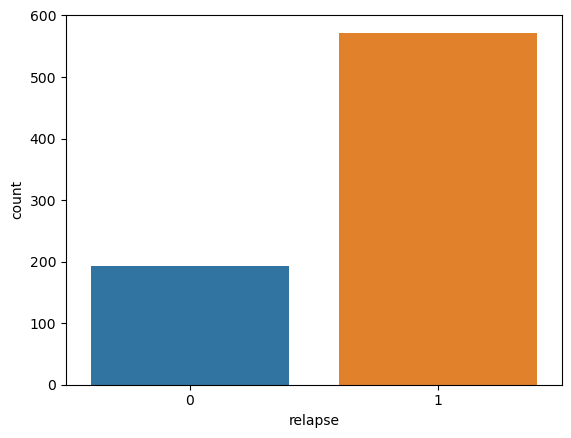

In [16]:
sns.countplot(x = 'relapse', data = dataset)
plt.show()

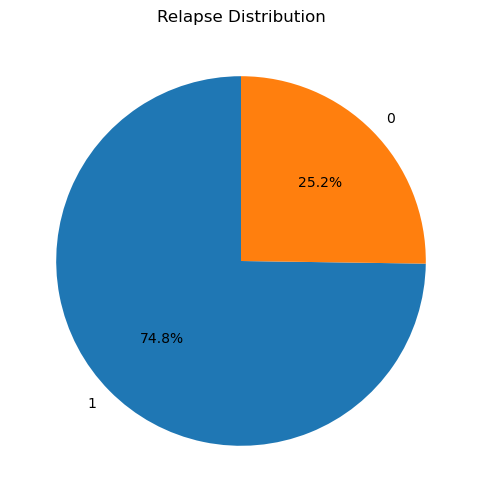

In [17]:
relapse_counts = dataset['relapse'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(relapse_counts, labels=relapse_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Relapse Distribution')
plt.show()

In [18]:
dataset["AGE"].value_counts()

AGE
6     141
7     140
5     107
8      95
2      62
9      54
4      51
11     40
10     30
3      24
1      19
12      2
Name: count, dtype: int64

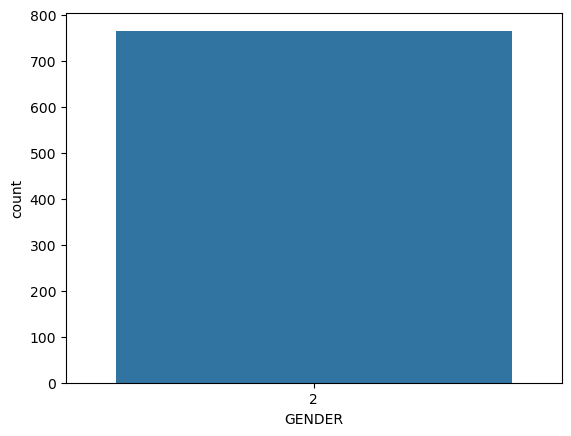

In [19]:
#focussed on women
sns.countplot(x = 'GENDER', data = dataset)
plt.show()

In [20]:
dataset["GENDER"].value_counts()

GENDER
2    765
Name: count, dtype: int64

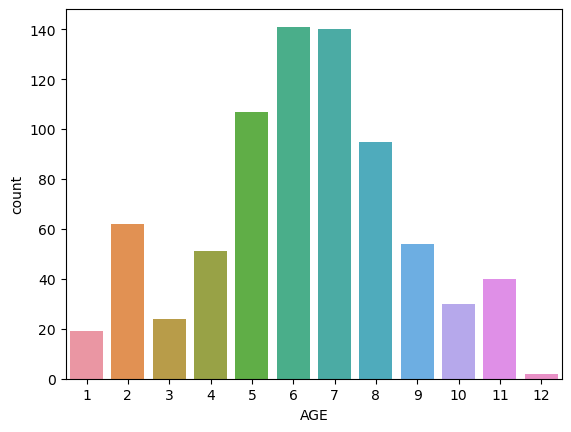

In [21]:
sns.countplot(x = "AGE", data = dataset)
plt.show()

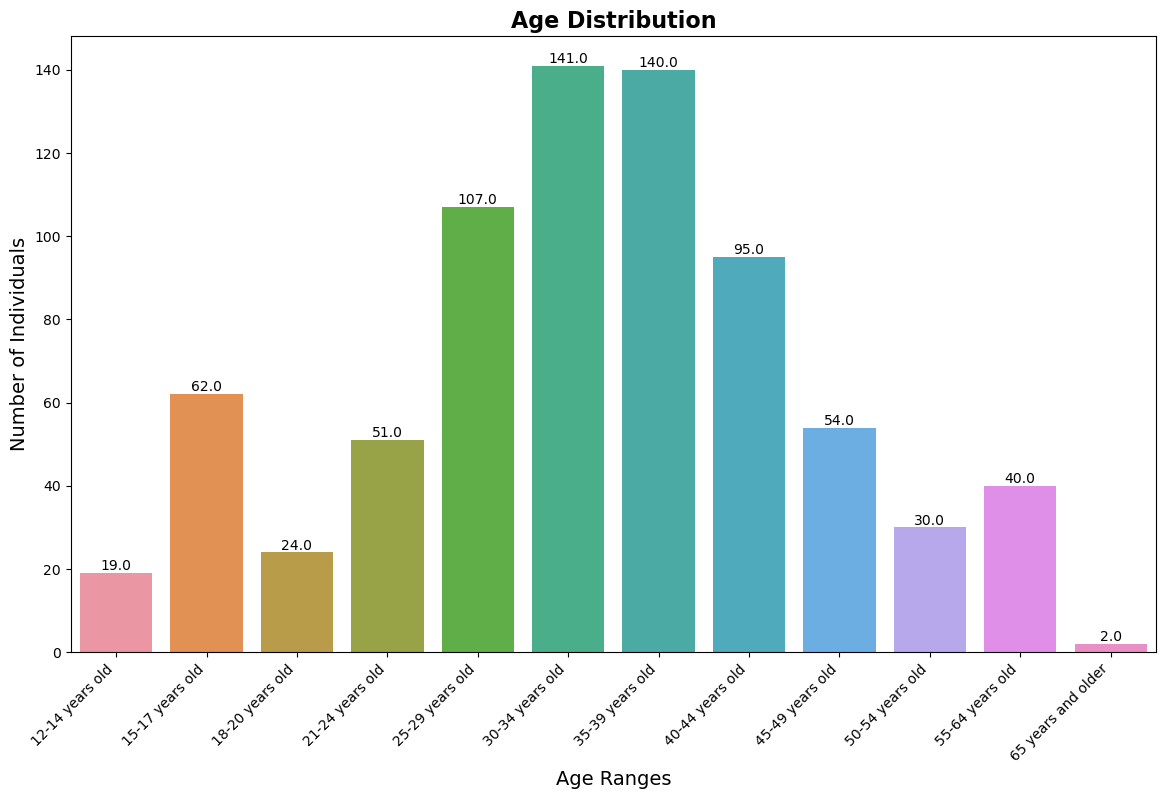

In [22]:
df1 = dataset.copy()
age_ranges = {
    1: '12-14 years old',
    2: '15-17 years old',
    3: '18-20 years old',
    4: '21-24 years old',
    5: '25-29 years old',
    6: '30-34 years old',
    7: '35-39 years old',
    8: '40-44 years old',
    9: '45-49 years old',
    10: '50-54 years old',
    11: '55-64 years old',
    12: '65 years and older'
}

# Map the numerical labels to age range labels
df1.loc[:, 'Age Range'] = df1['AGE'].map(age_ranges)


# Create the countplot
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Age Range', data=df1, order=[age_ranges[i] for i in sorted(age_ranges.keys())])

# Rotate x labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Add titles and labels
ax.set_title('Age Distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('Age Ranges', fontsize=14)
ax.set_ylabel('Number of Individuals', fontsize=14)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', 
                va='center', 
                xytext=(0, 5), 
                textcoords='offset points')
# Show the plot
plt.show()

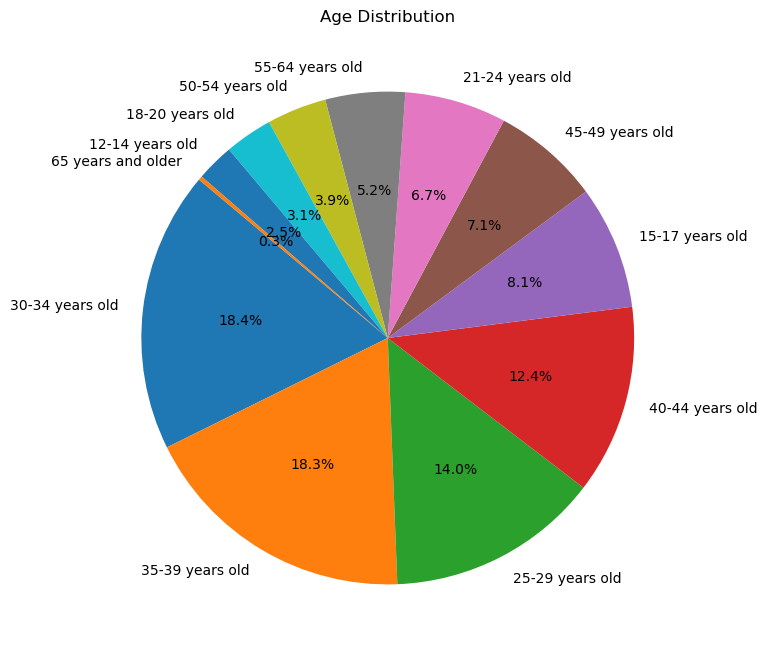

In [23]:
age_counts = df1['Age Range'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Distribution')
plt.show()


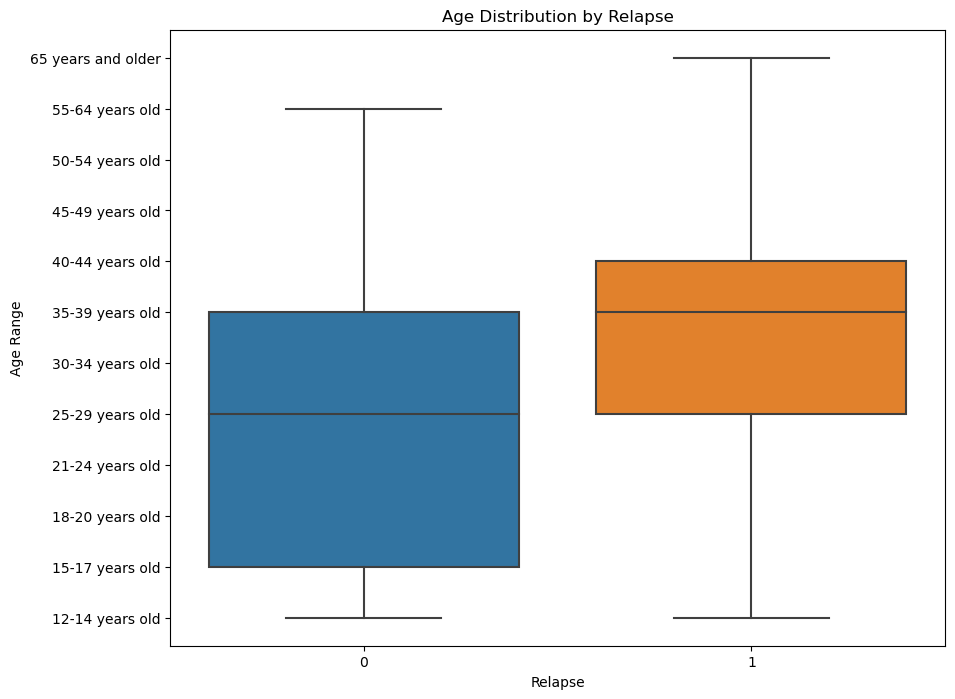

In [24]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='relapse', y='AGE', data=dataset)
plt.title('Age Distribution by Relapse')
plt.xlabel('Relapse')
plt.ylabel('Age Range')
plt.yticks(ticks=range(1, 13), labels=[
    '12-14 years old',
    '15-17 years old',
    '18-20 years old',
    '21-24 years old',
    '25-29 years old',
    '30-34 years old',
    '35-39 years old',
    '40-44 years old',
    '45-49 years old',
    '50-54 years old',
    '55-64 years old',
    '65 years and older'
])
plt.show()

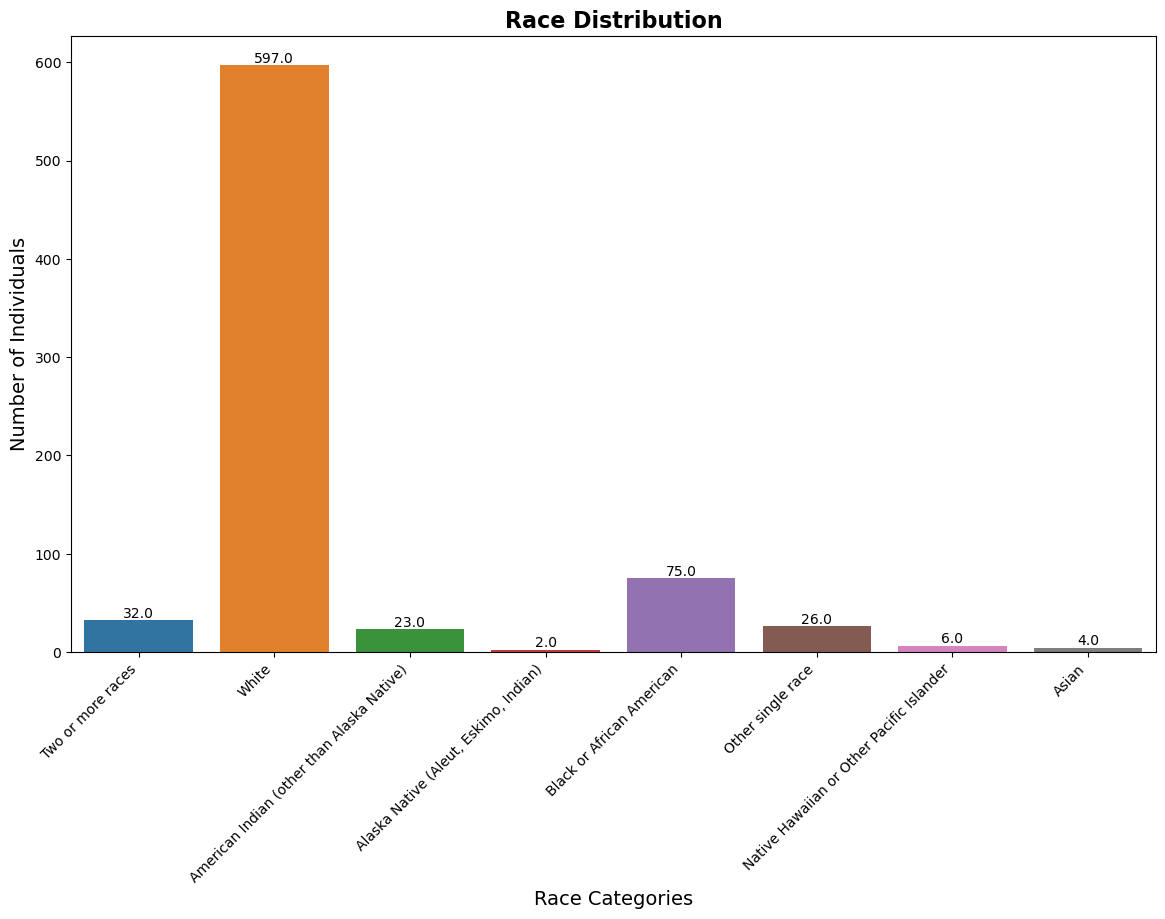

In [25]:
race_labels = {
    1: 'Alaska Native (Aleut, Eskimo, Indian)',
    2: 'American Indian (other than Alaska Native)',
    3: 'Asian or Pacific Islander',
    4: 'Black or African American',
    5: 'White',
    6: 'Asian',
    7: 'Other single race',
    8: 'Two or more races',
    9: 'Native Hawaiian or Other Pacific Islander'
}

# Map the numerical labels to race labels
df1.loc[:, 'Race'] = df1['RACE'].map(race_labels)

# Create the countplot
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Race', data=df1)

# Rotate x labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Add titles and labels
ax.set_title('Race Distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('Race Categories', fontsize=14)
ax.set_ylabel('Number of Individuals', fontsize=14)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', 
                va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Show the plot
plt.show()

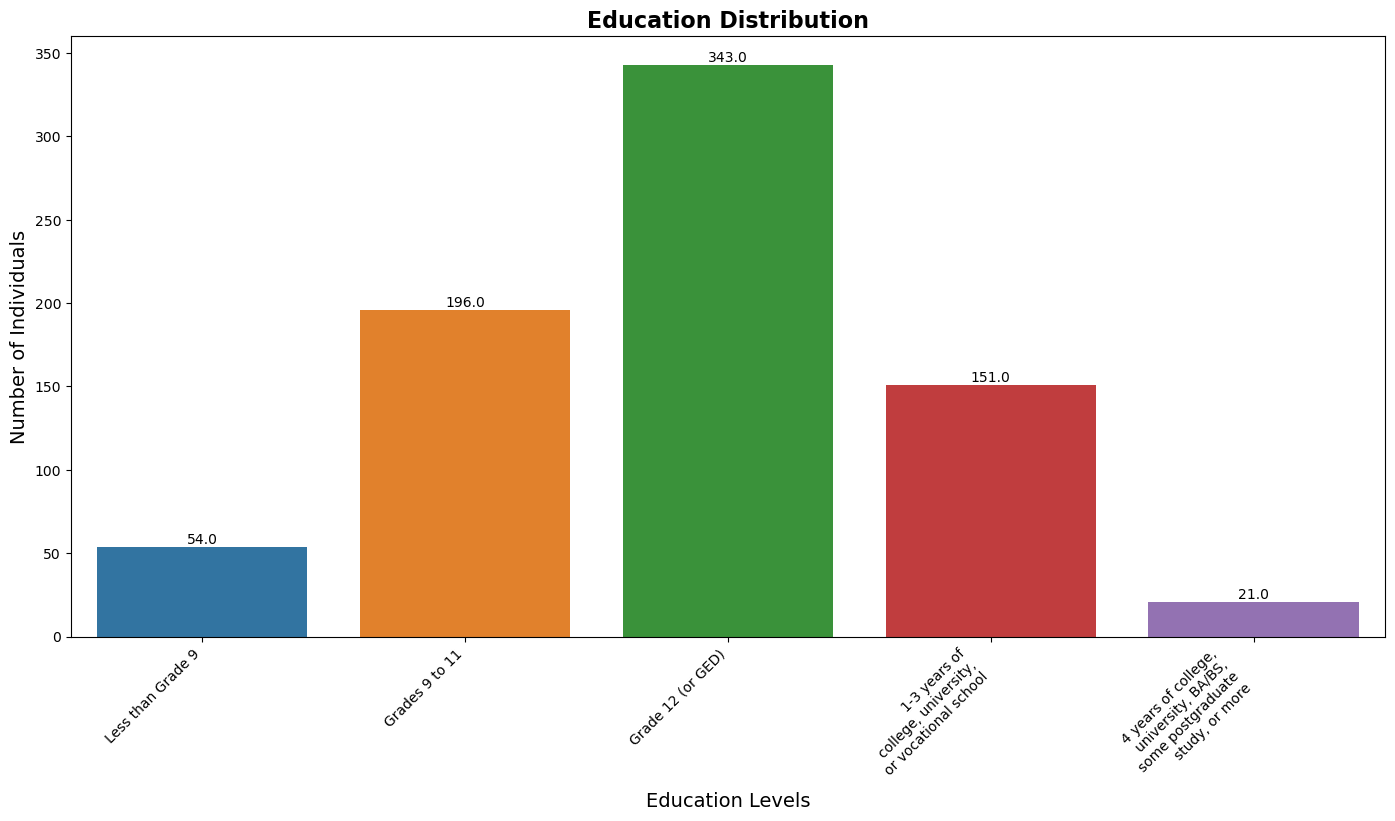

In [26]:
import textwrap 
# Define the education labels
education_labels = {
    1: 'Less than Grade 9',
    2: 'Grades 9 to 11',
    3: 'Grade 12 (or GED)',
    4: '1-3 years of college, university, or vocational school',
    5: '4 years of college, university, BA/BS, some postgraduate study, or more'
}

# Map the numerical labels to education labels
df1['Education'] = df1['EDUC'].map(education_labels)

education_order = [
    'Less than Grade 9',
    'Grades 9 to 11',
    'Grade 12 (or GED)',
    '1-3 years of college, university, or vocational school',
    '4 years of college, university, BA/BS, some postgraduate study, or more'
]

# Create the countplot with specified order
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Education', data=df1, order=education_order)
# Rotate x labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)

# Manually wrap long labels
labels = [textwrap.fill(label.get_text(), 20) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)

# Adjust layout to make room for long labels
plt.tight_layout()

# Add titles and labels
ax.set_title('Education Distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('Education Levels', fontsize=14)
ax.set_ylabel('Number of Individuals', fontsize=14)


# Annotate each bar with the count value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', 
                va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Show the plot
plt.show()

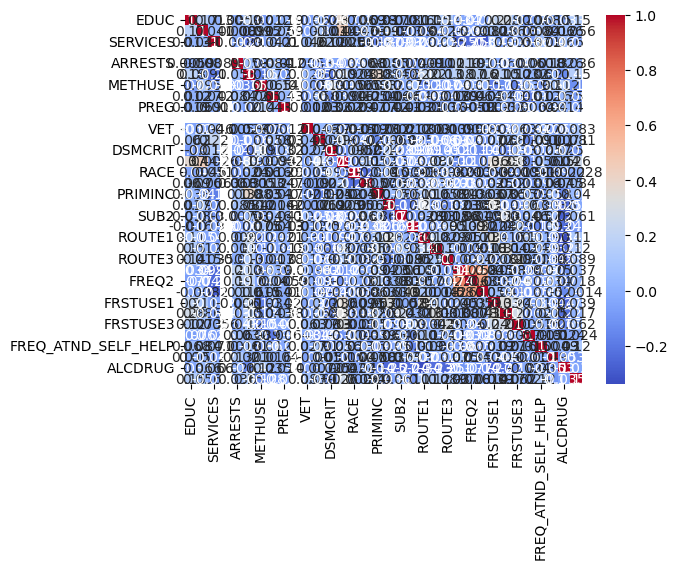

In [27]:
correlation = dataset.corr()
sns.heatmap(correlation, annot = True, cmap= "coolwarm")
plt.show()

In [28]:
X = dataset.drop('relapse', axis=1)
y = dataset['relapse']
# Calculate the correlation matrix
correlation_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop highly correlated features
X_reduced = X.drop(columns=to_drop)

print("Features to drop:", to_drop)
print("Remaining features:", X_reduced.columns)

Features to drop: []
Remaining features: Index(['EDUC', 'MARSTAT', 'SERVICES', 'PSOURCE', 'ARRESTS', 'EMPLOY',
       'METHUSE', 'PSYPROB', 'PREG', 'GENDER', 'VET', 'LIVARAG', 'DSMCRIT',
       'AGE', 'RACE', 'ETHNIC', 'PRIMINC', 'SUB1', 'SUB2', 'SUB3', 'ROUTE1',
       'ROUTE2', 'ROUTE3', 'FREQ1', 'FREQ2', 'FREQ3', 'FRSTUSE1', 'FRSTUSE2',
       'FRSTUSE3', 'PRIMPAY', 'FREQ_ATND_SELF_HELP', 'AMPHFLG', 'ALCDRUG'],
      dtype='object')


In [29]:
# Continue with further processing, such as RFE and scaling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, dataset['relapse'], test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier()

# Apply RFE(Recursive Feature Elimination)
selector = RFE(model, n_features_to_select=13)  # Adjust the number of features as needed
selector = selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[selector.support_]
print("Selected features after RFE:", selected_features)

Selected features after RFE: Index(['EDUC', 'SERVICES', 'DSMCRIT', 'AGE', 'SUB1', 'SUB2', 'SUB3', 'ROUTE1',
       'ROUTE3', 'FRSTUSE1', 'FRSTUSE2', 'FRSTUSE3', 'PRIMPAY'],
      dtype='object')


In [30]:
# Create a DataFrame with the selected features
X_selected = X[selected_features]

# Calculate the correlation matrix
correlation_matrix = X_selected.corr()

print("Correlation matrix of selected features:\n", correlation_matrix)

Correlation matrix of selected features:
               EDUC  SERVICES   DSMCRIT       AGE      SUB1      SUB2  \
EDUC      1.000000  0.012980 -0.090271  0.367989  0.016528  0.018069   
SERVICES  0.012980  1.000000  0.118763  0.002626 -0.076833 -0.093336   
DSMCRIT  -0.090271  0.118763  1.000000 -0.078769  0.124672 -0.088634   
AGE       0.367989  0.002626 -0.078769  1.000000  0.024814 -0.074285   
SUB1      0.016528 -0.076833  0.124672  0.024814  1.000000 -0.173960   
SUB2      0.018069 -0.093336 -0.088634 -0.074285 -0.173960  1.000000   
SUB3     -0.015748 -0.027909 -0.025574 -0.052369 -0.159927 -0.092724   
ROUTE1    0.106469 -0.074478 -0.089892 -0.047323  0.281069  0.027536   
ROUTE3    0.138568  0.035470 -0.052243  0.112175 -0.131596 -0.017735   
FRSTUSE1  0.204372 -0.041741 -0.103628  0.360074  0.310590 -0.005825   
FRSTUSE2  0.277550 -0.084002 -0.120916  0.331344 -0.040569  0.241940   
FRSTUSE3  0.120306  0.005649  0.032953  0.304024 -0.091499 -0.036416   
PRIMPAY  -0.069917 -0.

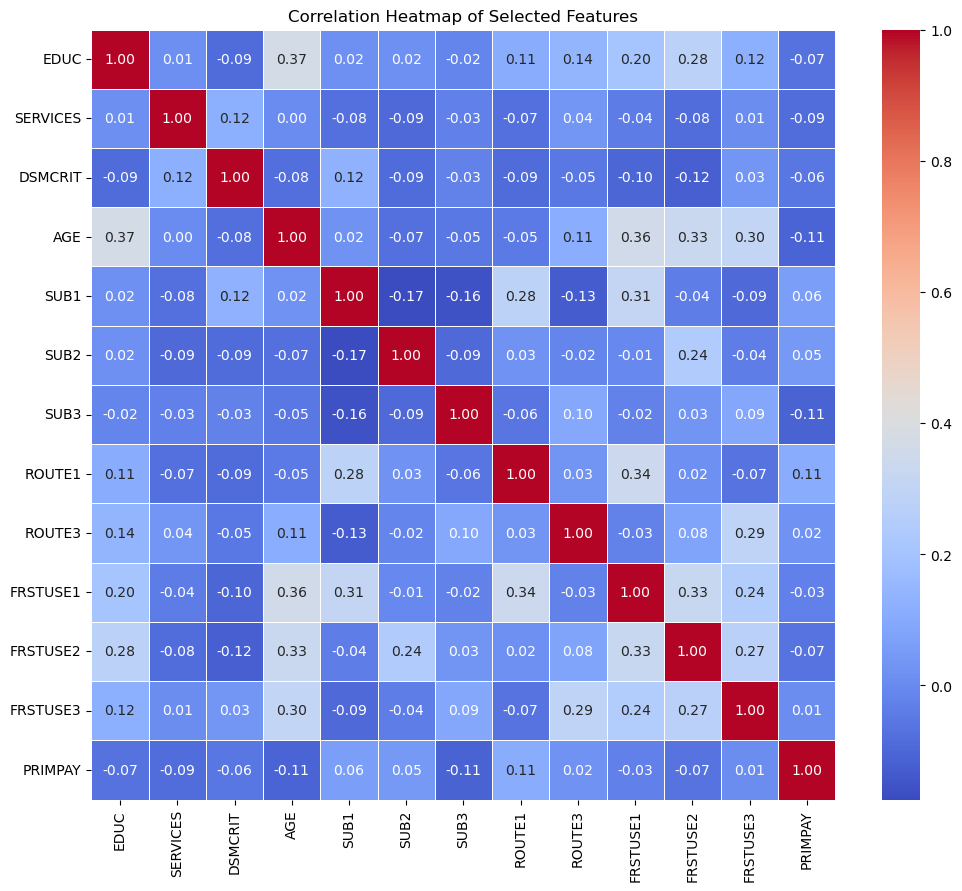

In [31]:
plt.figure(figsize=(12, 10))  # Adjust the figure size (width, height)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap of Selected Features')
plt.show()

/Users/himanigupta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


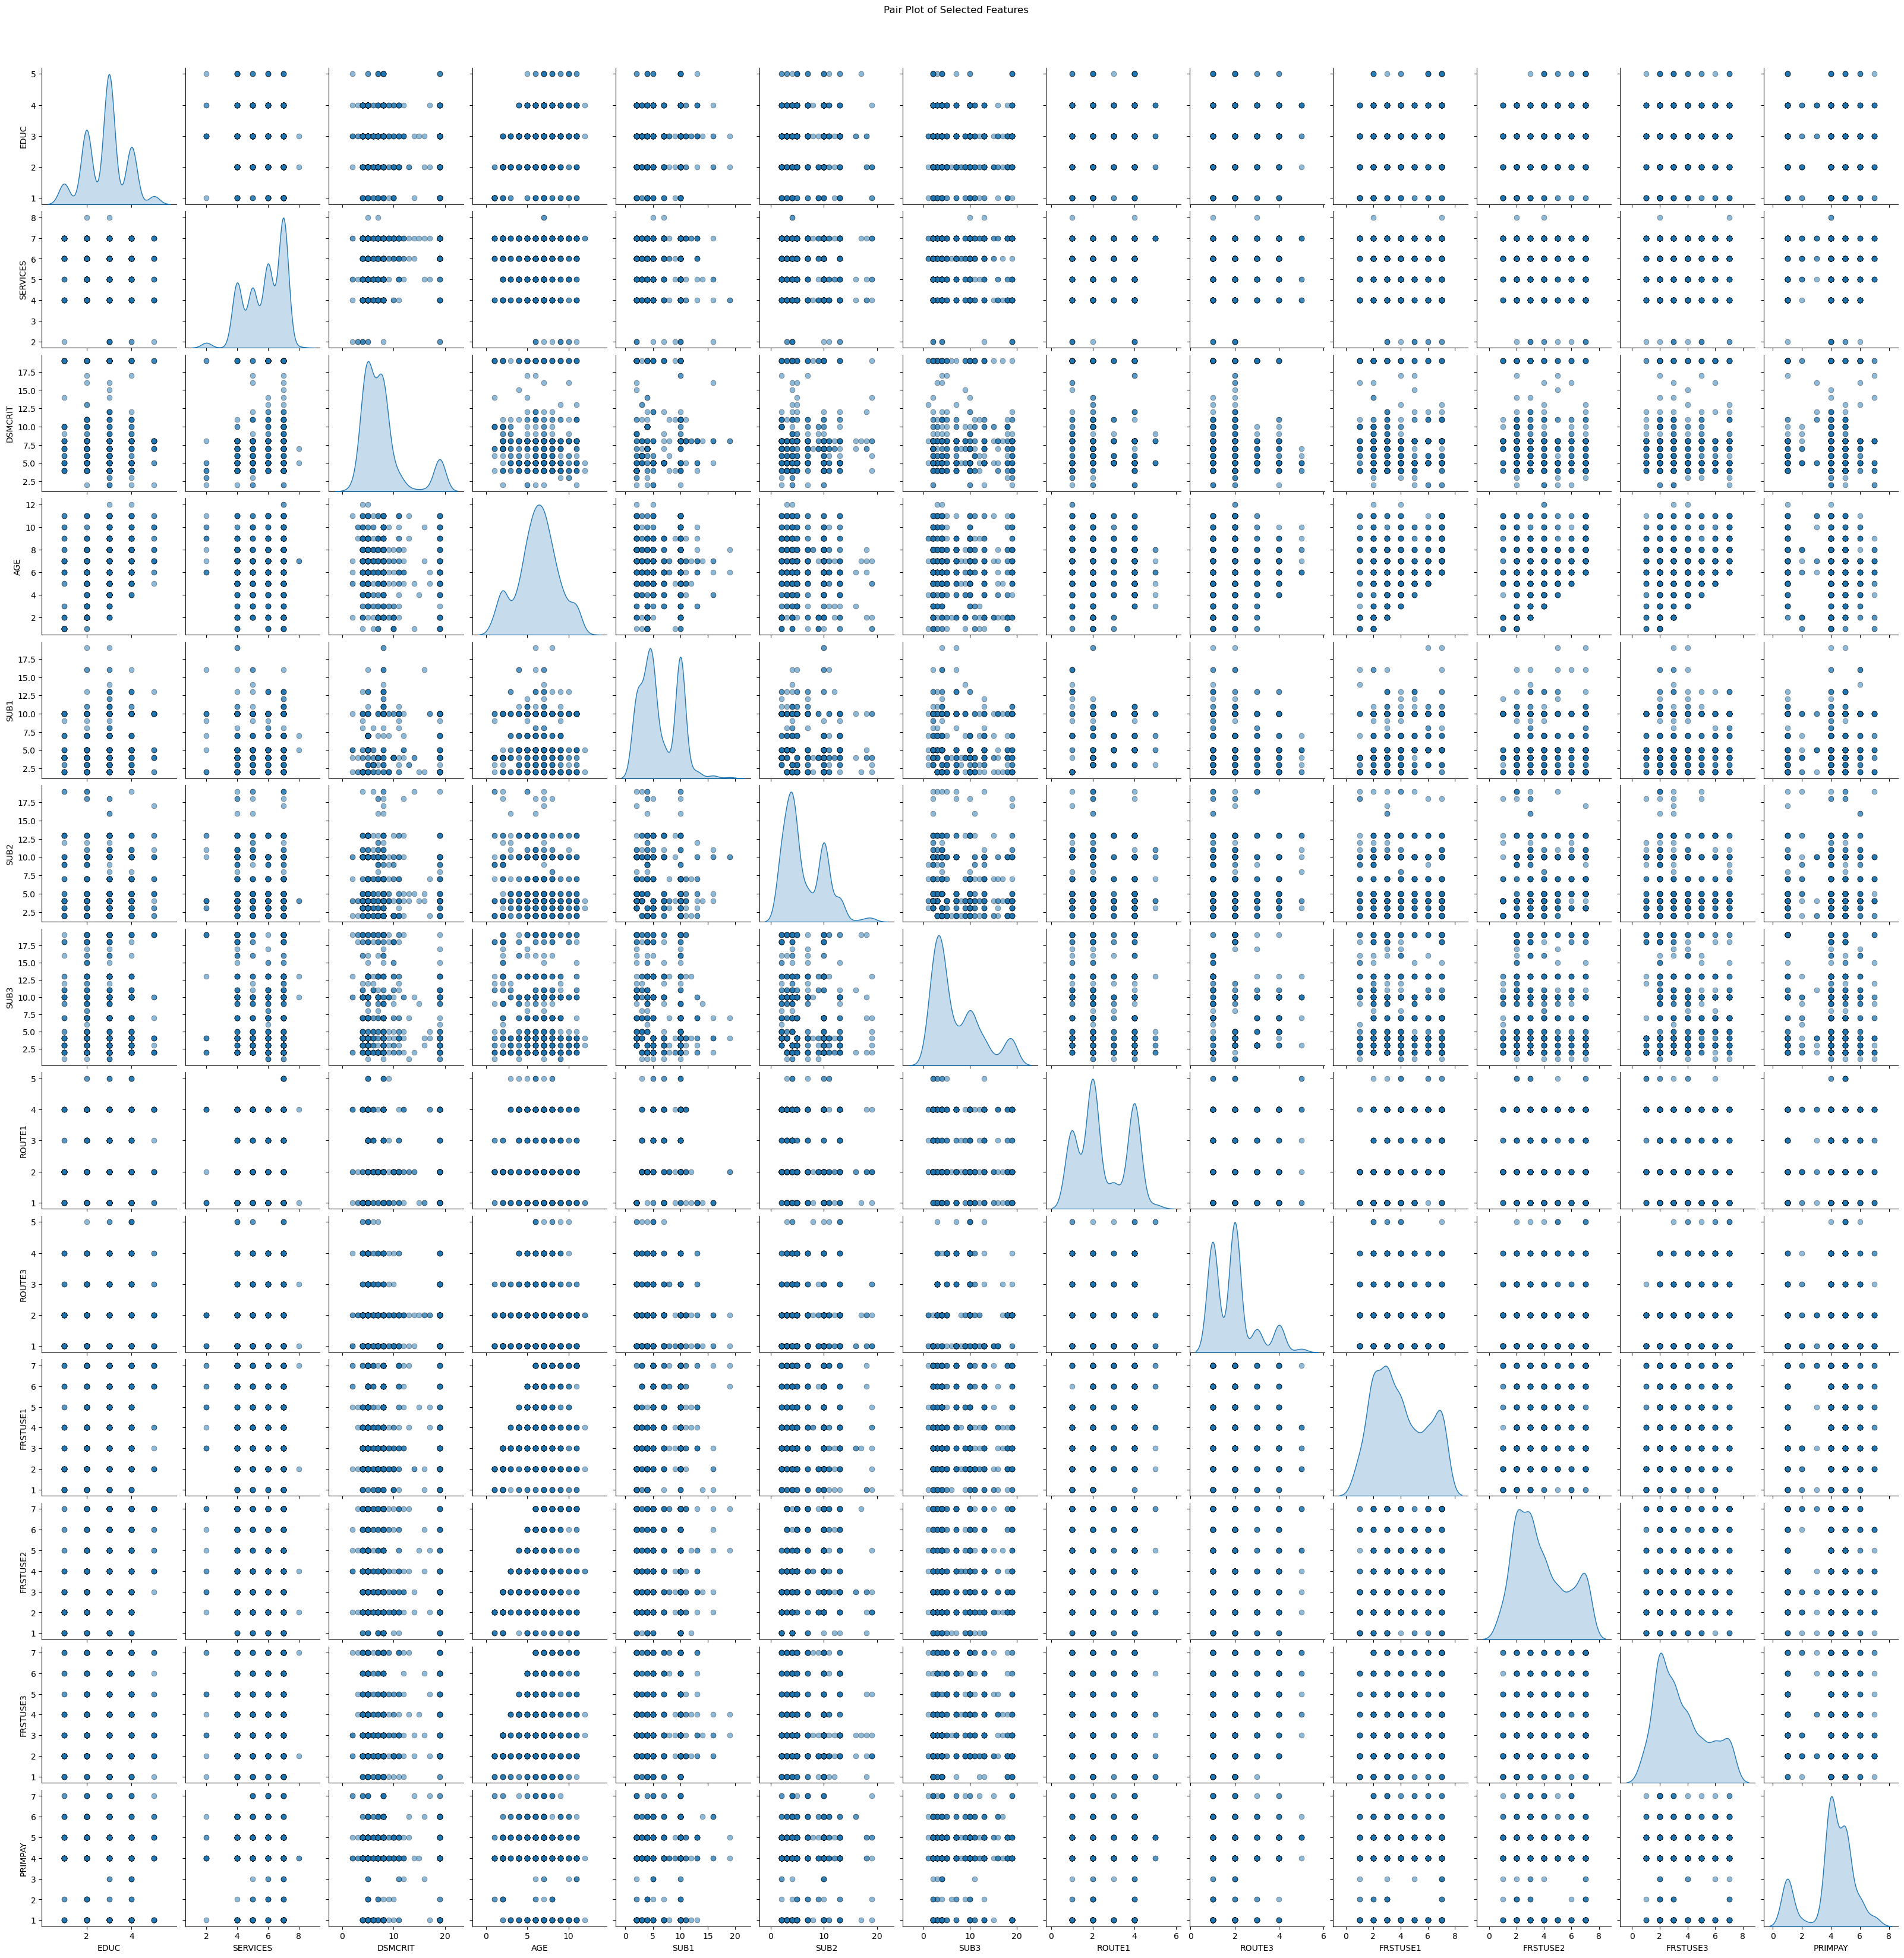

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(X_selected, diag_kind='kde', plot_kws={'alpha':0.5, 's':40, 'edgecolor':'k'}, height=2.5)
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

In [33]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

# Oversample the data: Use a technique like RandomOverSampler to balance the dataset.
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_selected, y)

In [34]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_resampled_scaled

array([[ 0.2870064 , -0.68880263, -0.02055089, ..., -0.38806682,
        -0.83964303, -0.07436376],
       [-0.81478997, -0.68880263, -0.02055089, ..., -0.93682879,
        -0.83964303, -1.39331178],
       [ 0.2870064 ,  0.13891818, -0.96095948, ..., -0.93682879,
         0.29643222, -0.07436376],
       ...,
       [-0.81478997, -1.51652345, -0.25565304, ..., -0.38806682,
        -0.2716054 , -0.07436376],
       [ 0.2870064 ,  0.96663899, -0.02055089, ...,  0.70945714,
         0.29643222, -2.05278579],
       [-0.81478997, -1.51652345,  2.56557275, ..., -0.38806682,
         2.00054511, -0.07436376]])

In [35]:
# Split the resampled and scaled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, matthews_corrcoef

# Train the Logistic Regression model with balanced class weights
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

Accuracy (Logistic Regression): 0.6593886462882096
Accuracy (Logistic Regression): 65.94%

Confusion Matrix:
 [[63 37]
 [41 88]]

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.61      0.63      0.62       100
     Class 1       0.70      0.68      0.69       129

    accuracy                           0.66       229
   macro avg       0.65      0.66      0.66       229
weighted avg       0.66      0.66      0.66       229



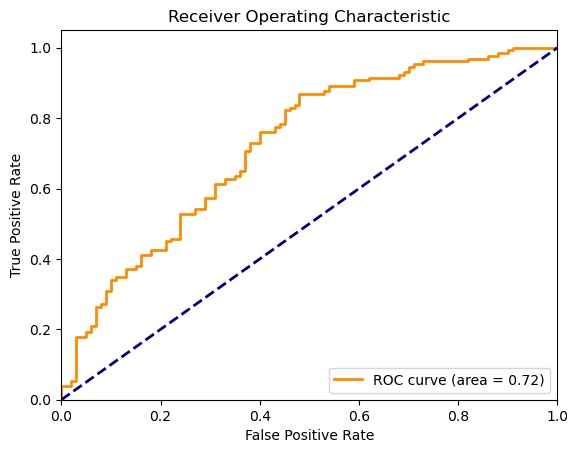

Matthews Correlation Coefficient (Logistic Regression): 0.31096756882520954


In [37]:
# Predict class labels and probabilities on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Logistic Regression):", accuracy)
print(f"Accuracy (Logistic Regression): {accuracy*100:.2f}%")
print()
# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print()
# Generate and print classification report
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print("Classification Report:\n", class_report)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Calculate and print Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient (Logistic Regression):", mcc)

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', random_state=42)

Accuracy (Decision Tree): 0.8209606986899564
Accuracy (decision Tree): 82.10%

Confusion Matrix (Decision Tree):
 [[ 87  13]
 [ 28 101]]

Classification Report (Decision Tree):
               precision    recall  f1-score   support

     Class 0       0.76      0.87      0.81       100
     Class 1       0.89      0.78      0.83       129

    accuracy                           0.82       229
   macro avg       0.82      0.83      0.82       229
weighted avg       0.83      0.82      0.82       229



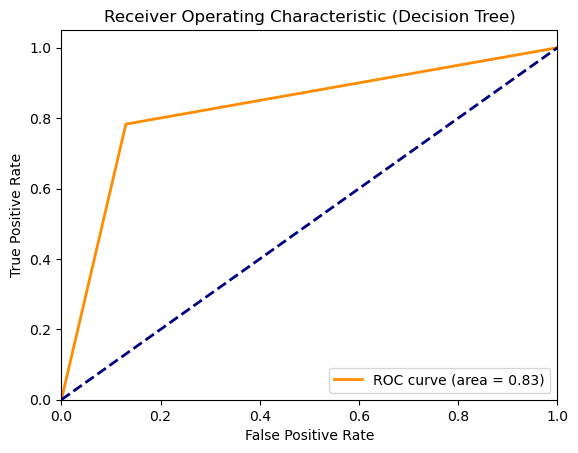

Matthews Correlation Coefficient (Decision Tree): 0.6476950823919608


In [39]:
# Predict class labels and probabilities on the test set
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Calculate and print accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy (Decision Tree):", accuracy_dt)
print(f"Accuracy (decision Tree): {accuracy_dt*100:.2f}%")
print()

# Generate and print confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix (Decision Tree):\n", conf_matrix_dt)
print()

# Generate and print classification report
class_report_dt = classification_report(y_test, y_pred_dt, target_names=['Class 0', 'Class 1'])
print("Classification Report (Decision Tree):\n", class_report_dt)

# Compute ROC curve and AUC for the Decision Tree model
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve for the Decision Tree model
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc='lower right')
plt.show()

# Calculate and print Matthews Correlation Coefficient (MCC) for the Decision Tree model
mcc_dt = matthews_corrcoef(y_test, y_pred_dt)
print("Matthews Correlation Coefficient (Decision Tree):", mcc_dt)

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Accuracy (Random Forest): 0.8820960698689956
Accuracy (Random Forest): 88.21%

Confusion Matrix (Random Forest):
 [[ 90  10]
 [ 17 112]]

Classification Report (Random Forest):
               precision    recall  f1-score   support

     Class 0       0.84      0.90      0.87       100
     Class 1       0.92      0.87      0.89       129

    accuracy                           0.88       229
   macro avg       0.88      0.88      0.88       229
weighted avg       0.88      0.88      0.88       229



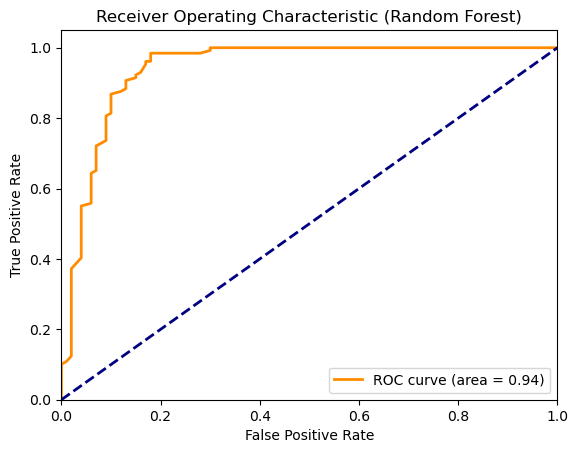

Matthews Correlation Coefficient (Random Forest): 0.7636722244606925


In [41]:
# Predict class labels and probabilities on the test set
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate and print accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)
print(f"Accuracy (Random Forest): {accuracy_rf*100:.2f}%")
print()

# Generate and print confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):\n", conf_matrix_rf)
print()

# Generate and print classification report
class_report_rf = classification_report(y_test, y_pred_rf, target_names=['Class 0', 'Class 1'])
print("Classification Report (Random Forest):\n", class_report_rf)

# Compute ROC curve and AUC for the Random Forest model
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for the Random Forest model
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc='lower right')
plt.show()

# Calculate and print Matthews Correlation Coefficient (MCC) for the Random Forest model
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)
print("Matthews Correlation Coefficient (Random Forest):", mcc_rf)

In [42]:
from sklearn.svm import SVC
# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

Accuracy (SVM): 0.7074235807860262
Accuracy (SVM): 70.74%

Confusion Matrix (SVM):
 [[72 28]
 [39 90]]

Classification Report (SVM):
               precision    recall  f1-score   support

     Class 0       0.65      0.72      0.68       100
     Class 1       0.76      0.70      0.73       129

    accuracy                           0.71       229
   macro avg       0.71      0.71      0.71       229
weighted avg       0.71      0.71      0.71       229



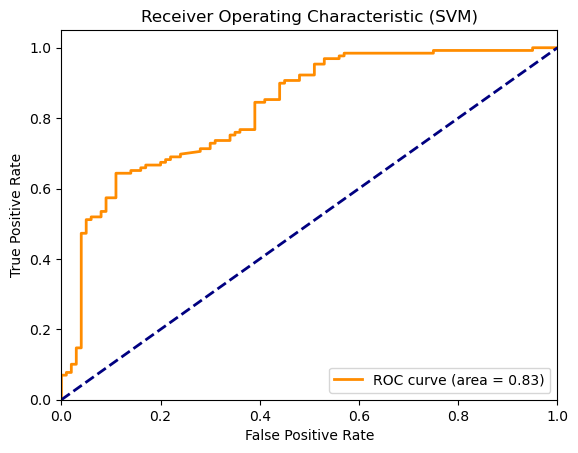

Matthews Correlation Coefficient (SVM): 0.4145054440261756


In [43]:
# Predict class labels and probabilities on the test set
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Calculate and print accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm)
print(f"Accuracy (SVM): {accuracy_svm*100:.2f}%")
print()

# Generate and print confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (SVM):\n", conf_matrix_svm)
print()

# Generate and print classification report
class_report_svm = classification_report(y_test, y_pred_svm, target_names=['Class 0', 'Class 1'])
print("Classification Report (SVM):\n", class_report_svm)

# Compute ROC curve and AUC for the SVM model
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for the SVM model
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc='lower right')
plt.show()

# Calculate and print Matthews Correlation Coefficient (MCC) for the SVM model
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)
print("Matthews Correlation Coefficient (SVM):", mcc_svm)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize and train the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

Accuracy (k-NN): 0.6855895196506551
Accuracy (k-NN): 68.56%

Confusion Matrix (k-NN):
 [[80 20]
 [52 77]]

Classification Report (k-NN):
               precision    recall  f1-score   support

     Class 0       0.61      0.80      0.69       100
     Class 1       0.79      0.60      0.68       129

    accuracy                           0.69       229
   macro avg       0.70      0.70      0.69       229
weighted avg       0.71      0.69      0.69       229



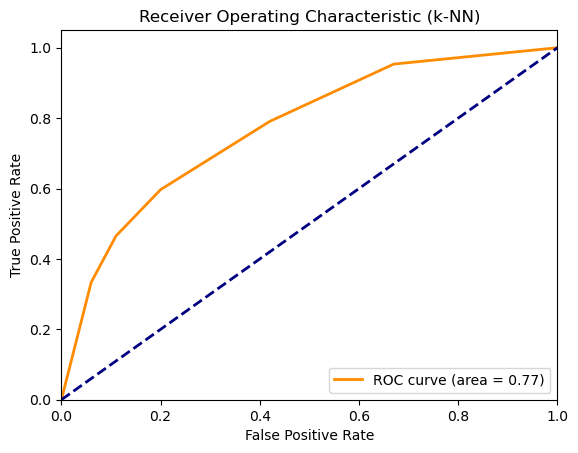

Matthews Correlation Coefficient (k-NN): 0.39838435338051664


In [45]:
# Predict class labels and probabilities on the test set
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Calculate and print accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy (k-NN):", accuracy_knn)
print(f"Accuracy (k-NN): {accuracy_knn*100:.2f}%")
print()

# Generate and print confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (k-NN):\n", conf_matrix_knn)
print()

# Generate and print classification report
class_report_knn = classification_report(y_test, y_pred_knn, target_names=['Class 0', 'Class 1'])
print("Classification Report (k-NN):\n", class_report_knn)

# Compute ROC curve and AUC for the k-NN model
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve for the k-NN model
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (k-NN)')
plt.legend(loc='lower right')
plt.show()

# Calculate and print Matthews Correlation Coefficient (MCC) for the k-NN model
mcc_knn = matthews_corrcoef(y_test, y_pred_knn)
print("Matthews Correlation Coefficient (k-NN):", mcc_knn)

In [46]:
from sklearn.naive_bayes import GaussianNB
# Initialize and train the Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

Accuracy (Gaussian Naive Bayes): 0.6943231441048034
Accuracy (Gaussian Naive Bayes): 69.43%

Confusion Matrix (Gaussian Naive Bayes):
 [[65 35]
 [35 94]]

Classification Report (Gaussian Naive Bayes):
               precision    recall  f1-score   support

     Class 0       0.65      0.65      0.65       100
     Class 1       0.73      0.73      0.73       129

    accuracy                           0.69       229
   macro avg       0.69      0.69      0.69       229
weighted avg       0.69      0.69      0.69       229



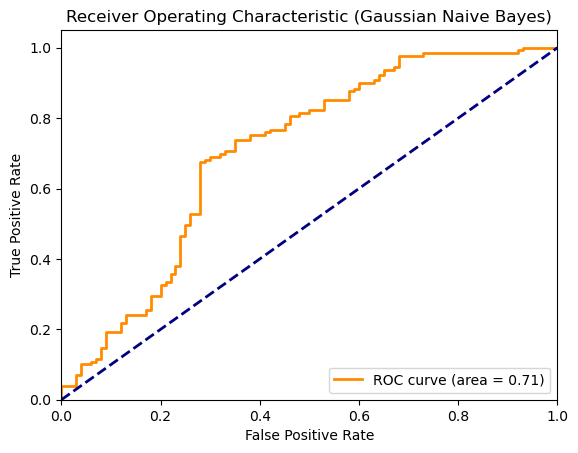

Matthews Correlation Coefficient (Gaussian Naive Bayes): 0.37868217054263564


In [47]:
# Predict class labels and probabilities on the test set
y_pred_gnb = gnb_model.predict(X_test)
y_prob_gnb = gnb_model.predict_proba(X_test)[:, 1]

# Calculate and print accuracy
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Accuracy (Gaussian Naive Bayes):", accuracy_gnb)
print(f"Accuracy (Gaussian Naive Bayes): {accuracy_gnb*100:.2f}%")                               
print()
                               
# Generate and print confusion matrix
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
print("Confusion Matrix (Gaussian Naive Bayes):\n", conf_matrix_gnb)
print()
                               
# Generate and print classification report
class_report_gnb = classification_report(y_test, y_pred_gnb, target_names=['Class 0', 'Class 1'])
print("Classification Report (Gaussian Naive Bayes):\n", class_report_gnb)

# Compute ROC curve and AUC for the Gaussian Naive Bayes model
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_prob_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

# Plot ROC curve for the Gaussian Naive Bayes model
plt.figure()
plt.plot(fpr_gnb, tpr_gnb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gnb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Gaussian Naive Bayes)')
plt.legend(loc='lower right')
plt.show()

# Calculate and print Matthews Correlation Coefficient (MCC) for the Gaussian Naive Bayes model
mcc_gnb = matthews_corrcoef(y_test, y_pred_gnb)
print("Matthews Correlation Coefficient (Gaussian Naive Bayes):", mcc_gnb)

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

Accuracy (Gradient Boosting): 0.7947598253275109
Accuracy (Gradient Boosting): 79.48%

Confusion Matrix (Gradient Boosting):
 [[ 82  18]
 [ 29 100]]

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

     Class 0       0.74      0.82      0.78       100
     Class 1       0.85      0.78      0.81       129

    accuracy                           0.79       229
   macro avg       0.79      0.80      0.79       229
weighted avg       0.80      0.79      0.80       229



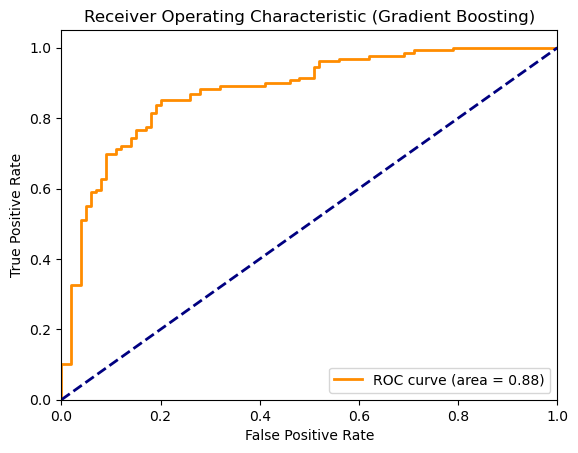

Matthews Correlation Coefficient (Gradient Boosting): 0.5906779508598694


In [49]:
# Predict class labels and probabilities on the test set
y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

# Calculate and print accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy (Gradient Boosting):", accuracy_gb)
print(f"Accuracy (Gradient Boosting): {accuracy_gb*100:.2f}%")
print()

# Generate and print confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix (Gradient Boosting):\n", conf_matrix_gb)
print()

# Generate and print classification report
class_report_gb = classification_report(y_test, y_pred_gb, target_names=['Class 0', 'Class 1'])
print("Classification Report (Gradient Boosting):\n", class_report_gb)

# Compute ROC curve and AUC for the Gradient Boosting model
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC curve for the Gradient Boosting model
plt.figure()
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Gradient Boosting)')
plt.legend(loc='lower right')
plt.show()

# Calculate and print Matthews Correlation Coefficient (MCC) for the Gradient Boosting model
mcc_gb = matthews_corrcoef(y_test, y_pred_gb)
print("Matthews Correlation Coefficient (Gradient Boosting):", mcc_gb)

In [50]:
from sklearn.model_selection import cross_val_score
# Initialize models
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier(),
    "Gaussian NB": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}
scores = cross_val_score(model, X_train, y_train, cv=5)  
# Perform cross-validation for each model
for name, model1 in models.items():
    scores = cross_val_score(model1, X_train, y_train, cv=5)
    print(f"{name} - Mean: {scores.mean():.4f}, Standard deviation: {scores.std():.4f}")

Random Forest - Mean: 0.8929, Standard deviation: 0.0074
SVM - Mean: 0.7475, Standard deviation: 0.0167
k-NN - Mean: 0.6962, Standard deviation: 0.0513
Gaussian NB - Mean: 0.6328, Standard deviation: 0.0436
Decision Tree - Mean: 0.8470, Standard deviation: 0.0303
Gradient Boosting - Mean: 0.7869, Standard deviation: 0.0213
Logistic Regression - Mean: 0.6536, Standard deviation: 0.0217


In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],  
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=500, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the model on the training dataset
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Evaluate the best model on the test data
best_rf = random_search.best_estimator_
test_accuracy = best_rf.score(X_test, y_test)
print("Test accuracy with best parameters: ", test_accuracy)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=log2, min_samples_leaf=4, min_

[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END boo

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=Tr

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=Tr

[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.8s
[CV] END bootstrap=False, class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstra

[CV] END bootstrap=False, class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END bootstrap=False, class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, cl

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, class_weight=None, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, c

[CV] END bootstrap=True, class_weight=None, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True

Best parameters found:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'class_weight': None, 'bootstrap': False}
Test accuracy with best parameters:  0.8820960698689956


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = best_rf.predict(X_test)
# Calculate performance metrics
accuracy = accuracy_score (y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')

f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy: .4f}")
print(f"precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

Accuracy:  0.8821
precision: 0.8820
Recall: 0.8821
F1 Score: 0.8820
Confusion Matrix:
 [[ 86  14]
 [ 13 116]]


In [53]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost classifier
adaboost_clf = AdaBoostClassifier(base_estimator=best_rf, n_estimators=50, random_state=42)
adaboost_clf.fit(X_train, y_train)

/Users/himanigupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=RandomForestClassifier(bootstrap=False,
                                                         max_depth=20,
                                                         max_features='log2',
                                                         n_estimators=200,
                                                         random_state=42),
                   random_state=42)

In [54]:
 y_pred =adaboost_clf.predict(X_test)
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy: .4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)


Accuracy:  0.8865
Precision: 0.8863
Recall: 0.8865
F1 Score: 0.8863
Confusion Matrix:
 [[ 86  14]
 [ 12 117]]


In [55]:
adaboost_clf.feature_importances_

array([0.07192817, 0.06012897, 0.07154109, 0.15108472, 0.05580529,
       0.08526107, 0.08364988, 0.05891262, 0.06172914, 0.07567792,
       0.08853756, 0.07661733, 0.05912625])

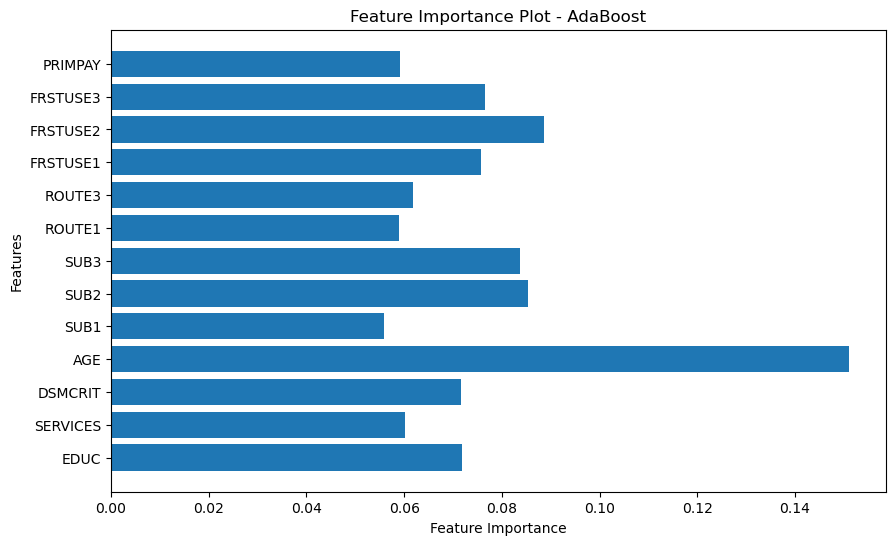

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the model
importances = adaboost_clf.feature_importances_

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance Plot - AdaBoost")
plt.barh(selected_features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")

plt.show()

In [57]:
# Generate predictions on the training set using the best Random Forest model
rf_train_predictions = best_rf.predict_proba(X_train)[:, 1].reshape(-1, 1)  # Using probability predictions

# Similarly, get predictions on the test set
rf_test_predictions = best_rf.predict_proba(X_test)[:, 1].reshape(-1, 1)

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Train the Gradient Boosting model using the predictions from the Random Forest as input features
gb_model.fit(rf_train_predictions, y_train)

GradientBoostingClassifier()

In [59]:
# Use the Gradient Boosting model to make predictions based on the Random Forest predictions on the test set
stacked_predictions = gb_model.predict(rf_test_predictions)

# Evaluate the accuracy of the stacked model
from sklearn.metrics import accuracy_score

stacked_accuracy = accuracy_score(y_test, stacked_predictions)
print("Stacked model accuracy: ", stacked_accuracy)

Stacked model accuracy:  0.8820960698689956


In [60]:
# Calculate accuracy
stacked_accuracy = accuracy_score(y_test, stacked_predictions)

# Calculate precision
stacked_precision = precision_score(y_test, stacked_predictions)

# Calculate recall
stacked_recall = recall_score(y_test, stacked_predictions)

# Calculate F1 score
stacked_f1 = f1_score(y_test, stacked_predictions)

# Print the metrics
print("Stacked Model Accuracy: ", stacked_accuracy)
print("Stacked Model Precision: ", stacked_precision)
print("Stacked Model Recall: ", stacked_recall)
print("Stacked Model F1 Score: ", stacked_f1)

Stacked Model Accuracy:  0.8820960698689956
Stacked Model Precision:  0.8923076923076924
Stacked Model Recall:  0.8992248062015504
Stacked Model F1 Score:  0.8957528957528959


In [61]:
from sklearn.metrics import classification_report


report = classification_report(y_test, stacked_predictions)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       100
           1       0.89      0.90      0.90       129

    accuracy                           0.88       229
   macro avg       0.88      0.88      0.88       229
weighted avg       0.88      0.88      0.88       229



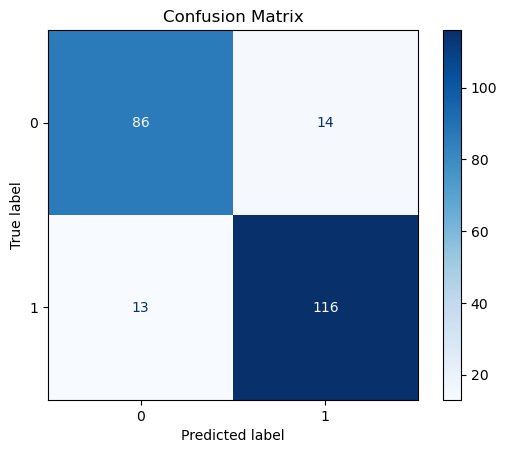

In [62]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, stacked_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

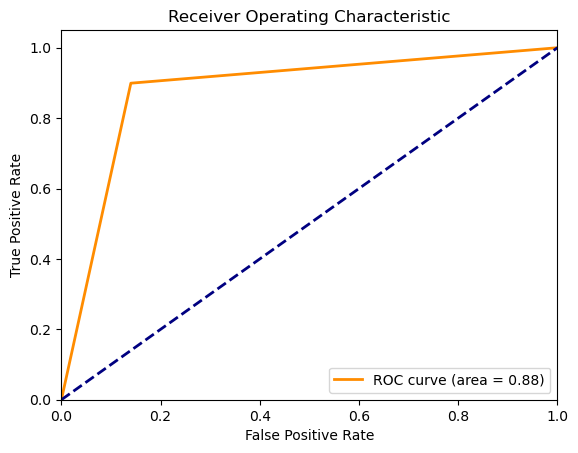

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] E

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] E

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstr

[CV] END bootstrap=True, class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=F

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, class_w

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstra

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] 

In [63]:
# Get the predicted probabilities for the positive class
stacked_probabilities = gb_model.predict_proba(rf_test_predictions)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, stacked_probabilities)

# Compute the AUC score
roc_auc = roc_auc_score(y_test, stacked_probabilities)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()